In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression

In [ ]:
df = pd.read_csv('data/churn modelling.csv', index_col=0)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
df.shape

(10000, 11)

In [ ]:
df.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X = df.drop('Exited', 1)
y = df.Exited

In [ ]:
y.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

In [ ]:
X.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

In [ ]:
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
cat_cols = ['HasCrCard', 'IsActiveMember', 'Geography', 'Gender']

In [ ]:
ct = ColumnTransformer([
    ('s1', RobustScaler(), num_cols),
    ('s2', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
])

In [ ]:
p = Pipeline([
    ('ct', ct),
    ('mod', LogisticRegression(random_state=0))
])

In [ ]:
p.fit(X_train, y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('s1', RobustScaler(),
                                                  ['CreditScore', 'Age',
                                                   'Tenure', 'Balance',
                                                   'NumOfProducts',
                                                   'EstimatedSalary']),
                                                 ('s2',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['HasCrCard',
                                                   'IsActiveMember',
                                                   'Geography', 'Gender'])])),
                ('mod', LogisticRegression(random_state=0))])

In [ ]:
# predictions are for the default threshold of 0.5
preds = p.predict(X_test)
preds[:15]

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
# real class labels of the first 15 people in the test set
np.array(y_test)[:15]

array([1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [ ]:
confusion_matrix(y_true=y_test, y_pred=preds)

array([[1530,   63],
       [ 319,   88]], dtype=int64)

In [ ]:
p.classes_

array([0, 1], dtype=int64)

And if we want to switch the class label positions:



In [ ]:
confusion_matrix(y_test, preds, labels=(1,0))

array([[  88,  319],
       [  63, 1530]], dtype=int64)

In [ ]:
confusion_matrix(y_test, preds, labels=(1,0)).ravel()

array([  88,  319,   63, 1530], dtype=int64)

In [ ]:
tp, fn, fp, tn = confusion_matrix(y_test, preds, labels=(1,0)).ravel()

In [ ]:
precision = tp/(tp+fp)
precision

0.5827814569536424

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
fbeta_score, matthews_corrcoef

In [ ]:
precision_score(y_test, preds)

0.5827814569536424

In [ ]:
recall_score(y_test, preds)

0.21621621621621623

In [ ]:
# harmonic mean of precision and recall
f1_score(y_test, preds)

0.31541218637992835

In [ ]:
# Precision more weight than recall (beta < 1)
fbeta_score(y_test, preds, beta=0.5)

0.4352126607319486

In [ ]:
# recall more weight than precision (beta > 1)
fbeta_score(y_test, preds, beta=2)

0.2473299606520517

In [ ]:
# when both classes need to be predicted with good accuracies, MCC is better than F-measures
matthews_corrcoef(y_test, preds)

0.2692195114515157

In [ ]:
from sklearn.metrics import SCORERS

In [ ]:
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

## Plotting ROC & Precision-Recall Curves using sklearn functions

In [ ]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_curve

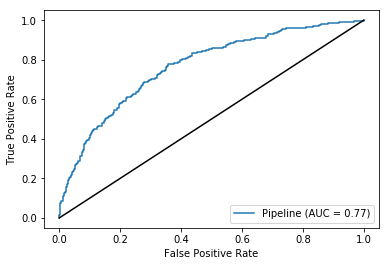

In [ ]:
plot_roc_curve(p, X_test, y_test)
plt.plot([0,1], [0,1], c='k')

In [ ]:
y_test.value_counts()

0    1593
1     407
Name: Exited, dtype: int64

In [ ]:
407/(1593+407)

0.2035

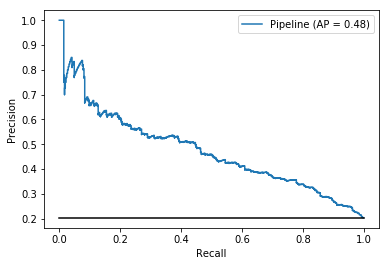

In [ ]:
plot_precision_recall_curve(p, X_test, y_test)
plt.plot([0,1], [0.2035,0.2035], c='k')
plt.legend(loc='best')